# Feature Scaling & Normalization with Heart Disease

## Import Libraries

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

## Load Heart Disease dataset

In [20]:
data = pd.read_csv(r'C:\Users\bbuser\Desktop\Jupyter\heart.csv')  
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## Explore and clean Data

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [22]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [23]:
data.describe(include="all")

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [24]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [25]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [29]:
# Check categorical and numerical columns
categorical_cols = ['cp', 'restecg', 'slope', 'thal', 'sex', 'fbs', 'exang', 'ca']
categorical_cols

['cp', 'restecg', 'slope', 'thal', 'sex', 'fbs', 'exang', 'ca']

In [28]:
numerical_cols = [col for col in data.columns if col not in categorical_cols + ['target']]
numerical_cols

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [31]:
# Check class distribution
data['target'].value_counts(normalize=True)

target
1    0.513171
0    0.486829
Name: proportion, dtype: float64

## split the model

In [33]:
# Split features and target
X = data.drop('target', axis=1)
y = data['target']

In [34]:
# Identify categorical columns (example: cp, restecg, slope, thal)
categorical_cols = ['cp', 'restecg', 'slope', 'thal']
numeric_cols = [c for c in X.columns if c not in categorical_cols]

In [35]:
# One-hot encode categorical features
X_cat = pd.get_dummies(X[categorical_cols], drop_first=True)
X_num = X[numeric_cols]
X_all = pd.concat([X_num, X_cat], axis=1)

In [36]:
# Train/validation split
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.2, random_state=42, stratify=y)

## Define scaling methods(Preprocessing Variants)

In [38]:
scalers = {
    'raw': None,
    'standard': StandardScaler(),
    'minmax': MinMaxScaler()
}

## Build neural network function

In [39]:
def build_model(input_dim, hidden_layers=2, units=32, activation='relu', optimizer='adam', learning_rate=0.001):
    model = keras.Sequential()
    model.add(keras.Input(shape=(input_dim,)))
    for _ in range(hidden_layers):
        model.add(keras.layers.Dense(units, activation=activation))
    model.add(keras.layers.Dense(1, activation='sigmoid'))  # binary classification
    if optimizer == 'adam':
        opt = keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        opt = keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        opt = optimizer  # default string for Keras
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

## Train models with different preprocessing

In [40]:
results = []

for scale_name, scaler in scalers.items():
    print(f"\nTraining with {scale_name} data")
    if scaler:
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
    else:
        X_train_scaled = X_train.values
        X_test_scaled = X_test.values
    
    model = build_model(input_dim=X_train_scaled.shape[1], hidden_layers=2, units=32, activation='relu', optimizer='adam')
    history = model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=50, batch_size=16, verbose=0)
    
    # Evaluate
    y_pred = (model.predict(X_test_scaled) > 0.5).astype(int).flatten()
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    
    results.append({
        'scaling': scale_name,
        'accuracy': acc,
        'precision': prec,
        'recall': rec
    })
    print(f"Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}")


Training with raw data
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step 
Accuracy: 0.8244, Precision: 0.7556, Recall: 0.9714

Training with standard data
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step 
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000

Training with minmax data
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step 
Accuracy: 0.9073, Precision: 0.8839, Recall: 0.9429


In [41]:
# Summarize results
results_df = pd.DataFrame(results)
print(results_df)

    scaling  accuracy  precision    recall
0       raw  0.824390   0.755556  0.971429
1  standard  1.000000   1.000000  1.000000
2    minmax  0.907317   0.883929  0.942857


## Plot training loss for each preprocessing method

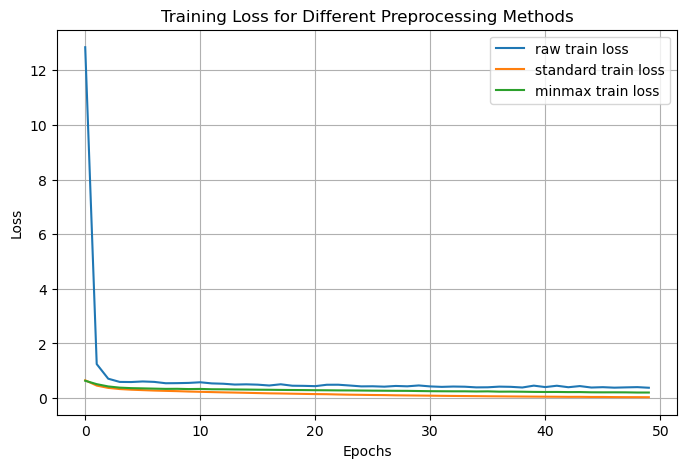

In [42]:
plt.figure(figsize=(8,5))
for scale_name, scaler in scalers.items():
    if scaler:
        X_train_scaled = scaler.fit_transform(X_train)
    else:
        X_train_scaled = X_train.values
    model = build_model(input_dim=X_train_scaled.shape[1], hidden_layers=2, units=32, activation='relu', optimizer='adam')
    history = model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=50, batch_size=16, verbose=0)
    plt.plot(history.history['loss'], label=f'{scale_name} train loss')
plt.title('Training Loss for Different Preprocessing Methods')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()